In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_csv("VN_housing_dataset.csv")

In [2]:
df.head()

,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,Đường Hoàng Quốc Việt,Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,Đường Kim Giang,Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,phố minh khai,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,Đường Võng Thị,Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,Đường Kim Giang,Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


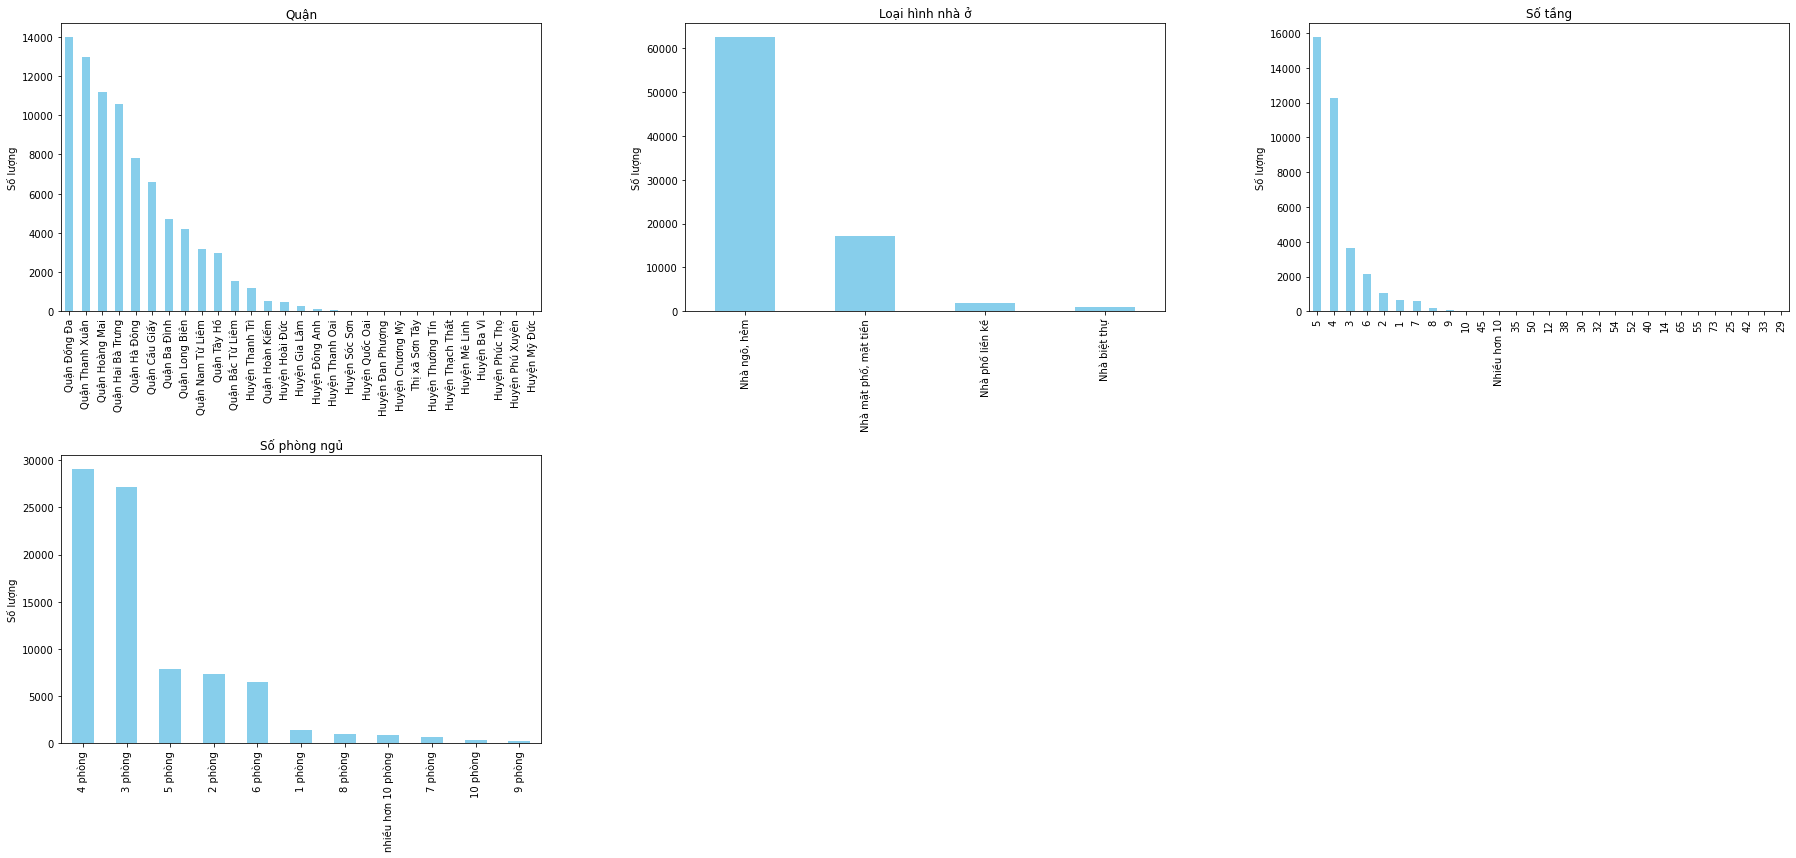

In [3]:
import matplotlib.pyplot as plt
columns_to_visualize = ["Quận", "Loại hình nhà ở", "Số tầng", "Số phòng ngủ"]
# Vẽ biểu đồ cột cho từng biến
plt.figure(figsize=(30, 20))  # Điều chỉnh kích thước của figure
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)  # Điều chỉnh số lượng hàng và cột của subplot
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Số lượng')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.3)  # Điều chỉnh các khoảng cách giữa các subplot
plt.show()

In [4]:
# Xóa hậu tố ' m²' từ các giá trị trong cột 'Diện tích'
df['Diện tích'] = df['Diện tích'].str.rstrip('m²')

# Chuyển đổi cột 'Diện tích' thành dạng số và chuyển các giá trị không thể chuyển đổi thành NaN
df['Diện tích'] = pd.to_numeric(df['Diện tích'], errors='coerce')

# Xóa các hàng mà có giá trị không phải số
df = df.dropna(subset=['Diện tích'])

# Hiển thị DataFrame sau khi xóa các hàng
# In ra cột 'Diện tích(m²)' thông qua thuộc tính
print(df['Diện tích'])



0        46.0
1        37.0
2        40.0
3        51.0
4        36.0
         ... 
82491    38.0
82492    50.0
82493    41.0
82494    60.0
82495    45.0
Name: Diện tích, Length: 82495, dtype: float64


In [5]:
# Xóa hậu tố ' triệu/m²' từ các giá trị trong cột 'Giá/m2'
df['Giá/m2'] = df['Giá/m2'].str.rstrip(' triệu/m²')

# Chuyển đổi cột 'Giá/m2' thành dạng số và chuyển các giá trị không thể chuyển đổi thành NaN
df['Giá/m2'] = pd.to_numeric(df['Giá/m2'], errors='coerce')

# Xóa các hàng mà có giá trị không phải số
df = df.dropna(subset=['Giá/m2'])

# Hiển thị DataFrame sau khi xóa các hàng
print(df['Giá/m2'])


2         65.0
3        100.0
8        120.0
13        86.0
14        75.0
         ...  
82480     95.0
82482    112.0
82486    106.0
82488     98.0
82492    292.0
Name: Giá/m2, Length: 16795, dtype: float64


In [6]:
df['Dài'] = df['Dài'].str.rstrip('m')
df['Dài'] = pd.to_numeric(df['Dài'], errors='coerce')
print(df['Dài'])



2        10.00
3        12.75
8        12.00
13         NaN
14       15.20
         ...  
82480      NaN
82482      NaN
82486      NaN
82488      NaN
82492      NaN
Name: Dài, Length: 16795, dtype: float64


In [7]:
# Xóa hậu tố 'm' từ các giá trị trong cột 'Rộng'
df['Rộng'] = df['Rộng'].str.rstrip('m')

# Chuyển đổi cột 'Rộng' thành dạng số và chuyển các giá trị không thể chuyển đổi thành NaN
df['Rộng'] = pd.to_numeric(df['Rộng'], errors='coerce')

# Hiển thị cột 'Rộng'
print(df['Rộng'])


2        4.0
3        4.0
8        6.5
13       5.0
14       3.9
        ... 
82480    NaN
82482    NaN
82486    NaN
82488    NaN
82492    NaN
Name: Rộng, Length: 16795, dtype: float64


In [8]:
# Thay đổi tên cột 'Diện tích' thành 'Diện tích(m²)'
df.rename(columns={'Diện tích': 'Diện tích(m²)'}, inplace=True)

# Thay đổi tên cột 'Giá/m2' thành 'Giá/m2(triệu/m²)'
df.rename(columns={'Giá/m2': 'Giá/m2(triệu/m²)'}, inplace=True)

df.rename(columns={'Rộng': 'Rộng(m)'}, inplace=True)
df.rename(columns={'Dài': 'Dài(m)'}, inplace=True)
# In ra chỉ hai cột 'Diện tích(m²)' và 'Giá/m2(triệu/m²)'
print(df[['Diện tích(m²)', 'Giá/m2(triệu/m²)', 'Rộng(m)', 'Dài(m)']])


       Diện tích(m²)  Giá/m2(triệu/m²)  Rộng(m)  Dài(m)
2               40.0              65.0      4.0   10.00
3               51.0             100.0      4.0   12.75
8               75.0             120.0      6.5   12.00
13              50.0              86.0      5.0     NaN
14              52.8              75.0      3.9   15.20
...              ...               ...      ...     ...
82480           40.0              95.0      NaN     NaN
82482           50.0             112.0      NaN     NaN
82486           50.0             106.0      NaN     NaN
82488           50.0              98.0      NaN     NaN
82492           50.0             292.0      NaN     NaN

[16795 rows x 4 columns]


In [9]:
df = df.dropna()
df.isnull().sum()

Địa chỉ             0
Quận                0
Phường              0
Loại hình nhà ở     0
Giấy tờ pháp lý     0
Số tầng             0
Số phòng ngủ        0
Diện tích(m²)       0
Dài(m)              0
Rộng(m)             0
Giá/m2(triệu/m²)    0
dtype: int64

In [10]:
print(df)

                    Địa chỉ               Quận                   Phường  \
2             phố minh khai  Quận Hai Bà Trưng         Phường Minh Khai   
37         Đường Vĩnh Quỳnh    Huyện Thanh Trì              Xã Tam Hiệp   
85        Đường Đê La Thành       Quận Đống Đa          Phường Kim Liên   
104         Đường Hoàng Mai     Quận Hoàng Mai     Phường Hoàng Văn Thụ   
120            Đường Kim Mã       Quận Ba Đình            Phường Kim Mã   
...                     ...                ...                      ...   
82298             15/22/269        Quận Tây Hồ           Phường Xuân La   
82315      Đường Thái Thịnh       Quận Đống Đa         Phường Ngã Tư Sở   
82319       Đường Bạch Đằng  Quận Hai Bà Trưng         Phường Bạch Đằng   
82332  Đường Khuất Duy Tiến    Quận Thanh Xuân  Phường Thanh Xuân Trung   
82356     Đường Nguyễn Trãi    Quận Thanh Xuân       Phường Thượng Đình   

             Loại hình nhà ở Giấy tờ pháp lý Số tầng        Số phòng ngủ  \
2               Nhà ngõ

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 2 to 82356
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Địa chỉ           2398 non-null   object 
 1   Quận              2398 non-null   object 
 2   Phường            2398 non-null   object 
 3   Loại hình nhà ở   2398 non-null   object 
 4   Giấy tờ pháp lý   2398 non-null   object 
 5   Số tầng           2398 non-null   object 
 6   Số phòng ngủ      2398 non-null   object 
 7   Diện tích(m²)     2398 non-null   float64
 8   Dài(m)            2398 non-null   float64
 9   Rộng(m)           2398 non-null   float64
 10  Giá/m2(triệu/m²)  2398 non-null   float64
dtypes: float64(4), object(7)
memory usage: 224.8+ KB


In [12]:
# Thêm cột mới 'Tổng giá tiền' tính từ 'Diện tích(m²)' nhân với 'Giá/m2(triệu/m²)'
df['Tổng giá tiền(tỷ đồng)'] = df['Diện tích(m²)'] * df['Giá/m2(triệu/m²)']

# Hiển thị DataFrame sau khi thêm cột mới
print(df['Tổng giá tiền(tỷ đồng)'])


2         2600.0
37        2150.0
85        2800.0
104       2100.0
120       1800.0
          ...   
82298     3400.0
82315     7500.0
82319     5900.0
82332    12900.0
82356    11500.0
Name: Tổng giá tiền(tỷ đồng), Length: 2398, dtype: float64


In [13]:
# Chuyển đổi cột 'Số phòng ngủ' thành dạng số nguyên và chuyển các giá trị không thể chuyển đổi thành NaN
df['Số phòng ngủ'] = pd.to_numeric(df['Số phòng ngủ'].str.rstrip('phòng'), errors='coerce').astype('Int64')
df = df.dropna(subset=['Số phòng ngủ'])

# Chuyển đổi cột 'Số tầng' thành dạng số nguyên và chuyển các giá trị không thể chuyển được thành NaN
df['Số tầng'] = pd.to_numeric(df['Số tầng'], errors='coerce').astype('Int64')

# Hiển thị cột 'Số phòng ngủ'

print(df[['Số phòng ngủ','Số tầng']])



       Số phòng ngủ  Số tầng
2                 4        4
37                4        4
85                3        3
104               3        3
120               2        3
...             ...      ...
82289             4        5
82298             3        3
82315             4        4
82319             4        3
82332             3        3

[2370 rows x 2 columns]


In [14]:
df["Địa chỉ"].unique()

array(['phố minh khai', 'Đường Vĩnh Quỳnh', 'Đường Đê La Thành',
       'Đường Hoàng Mai', 'Đường Kim Mã', 'Đường Ba La',
       'Đường Quan Nhân', 'ngọc tri', '35', 'B3-261', '8',
       'Đường Võ Thị Sáu', 'số 5 nghách 8711phố yên lộ',
       'Đường Vĩnh Phúc', '2', 'Đỗ Quang', 'Đường Trần Phú',
       'Đường Mậu Lương', 'Đường Bùi Xương Trạch', 'Láng Hạ', '325',
       'Đường Thành', 'Đường Yên Lộ', 'Đường Nguyễn Chí Thanh',
       'Đường Khương Thượng', 'Đường Tân Ấp', 'Đường Tân Mai', 'giải',
       'Đường Lê Trọng Tấn', 'Đường Thái Hà||431', 'Hồng Tiến',
       'Đường Ngọc Thụy', '#VALUE!', 'Đường Trần Khát Chân',
       'Đường Giải Phóng', 'Trương Định', '10', 'Đường Minh Khai',
       'Đường Trần Quốc Hoàn', 'Số11/433', '3 ngõ 176', 'Đường Kim Ngưu',
       'Đường Nguyễn Xiển', 'Đường Nguyễn Khoái', 'Đường Xã Đàn',
       'Đường Tố Hữu', 'Ngọc Thuỵ', 'Đường Doãn Kế Thiện', '318', '68',
       'Đường Hữu Lê', '66', 'Khương Đinh', 'Đường Lò Đúc',
       'Đường Thịnh Hào 3', '11'

In [15]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [16]:
country_map = shorten_categories(df['Địa chỉ'].value_counts(), 20)
df['Địa chỉ'] = df['Địa chỉ'].map(country_map)
df['Địa chỉ'].value_counts()

Other                   2065
Đường Lạc Long Quân       33
Đường Lê Trọng Tấn        32
Đường Minh Khai           30
Đường Quan Nhân           29
Đường Đội Cấn             27
Đường Nguyễn Trãi         24
Đường Khương Trung        23
Đường Kim Giang           23
Đường Thái Hà             22
Đường Cầu Giấy            21
Đường Hoàng Văn Thái      21
#VALUE!                   20
Name: Địa chỉ, dtype: int64

In [17]:
df['Địa chỉ'].value_counts()

Other                   2065
Đường Lạc Long Quân       33
Đường Lê Trọng Tấn        32
Đường Minh Khai           30
Đường Quan Nhân           29
Đường Đội Cấn             27
Đường Nguyễn Trãi         24
Đường Khương Trung        23
Đường Kim Giang           23
Đường Thái Hà             22
Đường Cầu Giấy            21
Đường Hoàng Văn Thái      21
#VALUE!                   20
Name: Địa chỉ, dtype: int64

In [18]:
df['Quận'].value_counts()

Quận Đống Đa         417
Quận Thanh Xuân      307
Quận Hà Đông         278
Quận Cầu Giấy        264
Quận Hai Bà Trưng    254
Quận Hoàng Mai       224
Quận Ba Đình         152
Quận Long Biên       123
Quận Tây Hồ          111
Quận Nam Từ Liêm      92
Quận Bắc Từ Liêm      53
Huyện Thanh Trì       40
Huyện Hoài Đức        22
Quận Hoàn Kiếm        15
Huyện Đông Anh         4
Huyện Gia Lâm          4
Huyện Đan Phượng       3
Huyện Chương Mỹ        2
Huyện Quốc Oai         2
Huyện Phúc Thọ         1
Huyện Thanh Oai        1
Huyện Mê Linh          1
Name: Quận, dtype: int64

In [19]:
df['Loại hình nhà ở'].value_counts()

Nhà ngõ, hẻm             1670
Nhà mặt phố, mặt tiền     573
Nhà phố liền kề            89
Nhà biệt thự               38
Name: Loại hình nhà ở, dtype: int64

In [20]:
df['Phường'].value_counts()

Phường Khương Trung    70
Phường Ô Chợ Dừa       62
Phường Minh Khai       58
Phường Yên Hoà         52
Phường Láng Hạ         49
                       ..
Thị trấn Phùng          1
Phường Phú Đô           1
Phường Cửa Đông         1
Phường Đồng Xuân        1
Phường Biên Giang       1
Name: Phường, Length: 188, dtype: int64

In [21]:
df['Số tầng'].value_counts()

5     1011
4      809
3      233
6      140
2       74
1       46
7       44
8        9
45       2
50       1
9        1
Name: Số tầng, dtype: Int64

In [22]:
df['Số phòng ngủ'].value_counts()

4     887
3     700
5     236
6     212
2     209
8      41
1      37
7      21
9      16
10     11
Name: Số phòng ngủ, dtype: Int64

In [23]:
df['Diện tích(m²)'].value_counts()

50.0     615
40.0     373
30.0     273
25.0     158
35.0     138
        ... 
325.0      1
82.5       1
131.0      1
92.0       1
96.0       1
Name: Diện tích(m²), Length: 89, dtype: int64

In [24]:
df['Dài(m)'].value_counts()

10.0      592
12.0      244
8.0       232
9.0       201
11.0      130
         ... 
8250.0      1
3.3         1
112.0       1
6.1         1
111.0       1
Name: Dài(m), Length: 135, dtype: int64

In [25]:
df['Rộng(m)'].value_counts()

4.00       857
5.00       480
3.00       306
6.00       100
3.50        90
          ... 
361.00       1
4.42         1
40.00        1
39.00        1
4500.00      1
Name: Rộng(m), Length: 110, dtype: int64

In [26]:
df.head()

,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích(m²),Dài(m),Rộng(m),Giá/m2(triệu/m²),Tổng giá tiền(tỷ đồng)
2,Other,Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,10.0,4.0,65.0,2600.0
37,Other,Huyện Thanh Trì,Xã Tam Hiệp,"Nhà ngõ, hẻm",Đã có sổ,4,4,43.0,11.0,4.0,50.0,2150.0
85,Other,Quận Đống Đa,Phường Kim Liên,"Nhà ngõ, hẻm",Đã có sổ,3,3,28.0,7.0,3.9,100.0,2800.0
104,Other,Quận Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà mặt phố, mặt tiền",Đã có sổ,3,3,21.0,7.0,3.0,100.0,2100.0
120,Other,Quận Ba Đình,Phường Kim Mã,"Nhà ngõ, hẻm",Đã có sổ,3,2,30.0,9.0,3.2,60.0,1800.0


In [27]:
df['Diện tích(m²)'].value_counts()

50.0     615
40.0     373
30.0     273
25.0     158
35.0     138
        ... 
325.0      1
82.5       1
131.0      1
92.0       1
96.0       1
Name: Diện tích(m²), Length: 89, dtype: int64

In [28]:
df.drop(df.index[df["Địa chỉ"] == "Other"], inplace=True)
df.head()

,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích(m²),Dài(m),Rộng(m),Giá/m2(triệu/m²),Tổng giá tiền(tỷ đồng)
234,Đường Quan Nhân,Quận Thanh Xuân,Phường Nhân Chính,"Nhà mặt phố, mặt tiền",Đã có sổ,4,4,40.0,4.0,4.0,140.0,5600.0
1282,Đường Lê Trọng Tấn,Quận Hà Đông,Phường Phú La,"Nhà ngõ, hẻm",Đã có sổ,5,4,40.0,11.0,4.0,75.0,3000.0
1351,#VALUE!,Quận Hai Bà Trưng,Phường Thanh Nhàn,"Nhà ngõ, hẻm",Đã có sổ,5,4,28.0,7.8,3.6,100.0,2800.0
1548,#VALUE!,Quận Hoàng Mai,Phường Hoàng Văn Thụ,Nhà phố liền kề,Đã có sổ,7,6,40.0,10.0,4.0,180.0,7200.0
1967,Đường Lê Trọng Tấn,Quận Hà Đông,Phường Phú La,Nhà phố liền kề,Đã có sổ,5,4,50.0,11.0,45.0,136.0,6800.0


In [29]:
df = df[["Địa chỉ","Quận","Phường", "Loại hình nhà ở", "Số tầng", "Số phòng ngủ", "Diện tích(m²)","Dài(m)","Rộng(m)","Tổng giá tiền(tỷ đồng)"]]
df.head()

,Địa chỉ,Quận,Phường,Loại hình nhà ở,Số tầng,Số phòng ngủ,Diện tích(m²),Dài(m),Rộng(m),Tổng giá tiền(tỷ đồng)
234,Đường Quan Nhân,Quận Thanh Xuân,Phường Nhân Chính,"Nhà mặt phố, mặt tiền",4,4,40.0,4.0,4.0,5600.0
1282,Đường Lê Trọng Tấn,Quận Hà Đông,Phường Phú La,"Nhà ngõ, hẻm",5,4,40.0,11.0,4.0,3000.0
1351,#VALUE!,Quận Hai Bà Trưng,Phường Thanh Nhàn,"Nhà ngõ, hẻm",5,4,28.0,7.8,3.6,2800.0
1548,#VALUE!,Quận Hoàng Mai,Phường Hoàng Văn Thụ,Nhà phố liền kề,7,6,40.0,10.0,4.0,7200.0
1967,Đường Lê Trọng Tấn,Quận Hà Đông,Phường Phú La,Nhà phố liền kề,5,4,50.0,11.0,45.0,6800.0


In [30]:
mask = ~df["Quận"].str.startswith("Phường")

# Lọc DataFrame để chỉ chứa các hàng không thỏa mãn mask
df = df[mask]

# In ra DataFrame sau khi lọc
print(df)

                   Địa chỉ               Quận                   Phường  \
234        Đường Quan Nhân    Quận Thanh Xuân        Phường Nhân Chính   
1282    Đường Lê Trọng Tấn       Quận Hà Đông            Phường Phú La   
1351               #VALUE!  Quận Hai Bà Trưng        Phường Thanh Nhàn   
1548               #VALUE!     Quận Hoàng Mai     Phường Hoàng Văn Thụ   
1967    Đường Lê Trọng Tấn       Quận Hà Đông            Phường Phú La   
...                    ...                ...                      ...   
80590    Đường Nguyễn Trãi    Quận Thanh Xuân         Phường Kim Giang   
80816      Đường Quan Nhân    Quận Thanh Xuân  Phường Thanh Xuân Trung   
80827        Đường Đội Cấn       Quận Ba Đình           Phường Đội Cấn   
81617        Đường Đội Cấn       Quận Ba Đình         Phường Liễu Giai   
81621  Đường Lạc Long Quân      Quận Cầu Giấy          Phường Nghĩa Đô   

             Loại hình nhà ở  Số tầng  Số phòng ngủ  Diện tích(m²)  Dài(m)  \
234    Nhà mặt phố, mặt tiền     

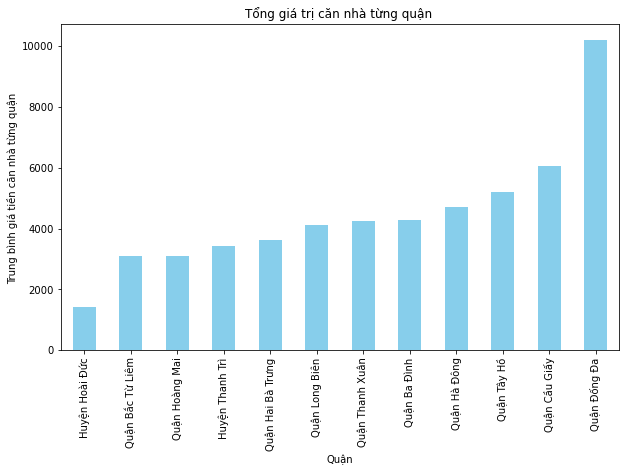

In [31]:

data = df.groupby(["Quận"])["Tổng giá tiền(tỷ đồng)"].mean().sort_values(ascending=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
data.plot(kind='bar', color='skyblue')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Quận')
plt.ylabel('Trung bình giá tiền căn nhà từng quận ')

# Đặt tiêu đề cho biểu đồ
plt.title('Tổng giá trị căn nhà từng quận ')

# Hiển thị biểu đồ
plt.show()

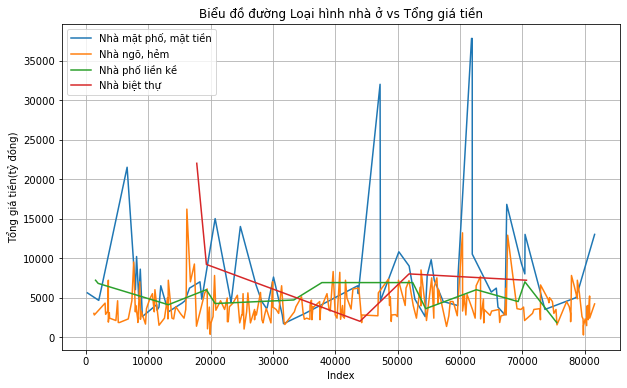

In [32]:
plt.figure(figsize=(10, 6))
for house_type in df['Loại hình nhà ở'].unique():
    df_house_type = df[df['Loại hình nhà ở'] == house_type]
    plt.plot(df_house_type['Tổng giá tiền(tỷ đồng)'], label=house_type)

plt.xlabel('Index')
plt.ylabel('Tổng giá tiền(tỷ đồng)')
plt.title('Biểu đồ đường Loại hình nhà ở vs Tổng giá tiền')
plt.legend()
plt.grid(True)
plt.show()


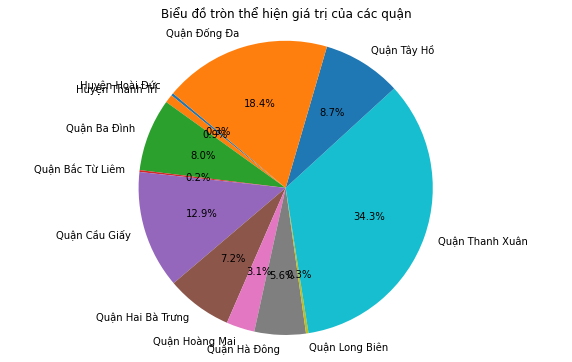

In [33]:
total_price_by_district = df.groupby('Quận')['Tổng giá tiền(tỷ đồng)'].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
plt.pie(total_price_by_district, labels=total_price_by_district.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tròn thể hiện giá trị của các quận')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

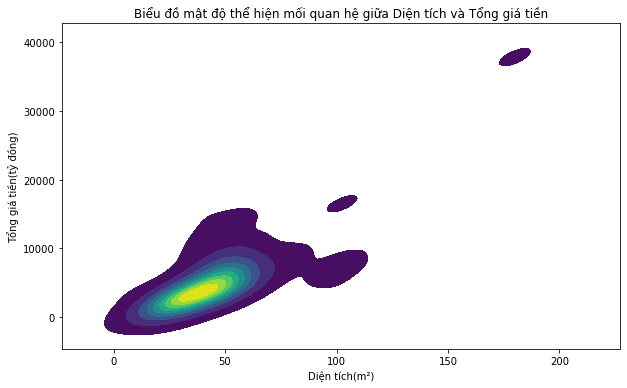

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Di chuyển lên đây
plt.title("Biểu đồ Diện tích và Tổng giá tiền")

sns.kdeplot(data=df, x='Diện tích(m²)', y='Tổng giá tiền(tỷ đồng)', cmap='viridis', fill=True)

# Đặt nhãn cho trục x và trục y
plt.xlabel('Diện tích(m²)')
plt.ylabel('Tổng giá tiền(tỷ đồng)')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ mật độ thể hiện mối quan hệ giữa Diện tích và Tổng giá tiền')

# Hiển thị biểu đồ
plt.show()  # Thay st.pyplot(plt)



In [35]:
from sklearn.preprocessing import LabelEncoder
le_diachi = LabelEncoder()
df['Địa chỉ'] = le_diachi.fit_transform(df['Địa chỉ'])
df["Địa chỉ"].unique()
#le.classes_

array([ 9,  5,  0,  7,  6, 11,  1,  3,  2, 10,  8,  4])

In [36]:
le_loaihinhnha = LabelEncoder()
df['Loại hình nhà ở'] = le_loaihinhnha.fit_transform(df['Loại hình nhà ở'])
df["Loại hình nhà ở"].unique()

array([1, 2, 3, 0])

In [37]:
le_quan = LabelEncoder()
df['Quận'] = le_quan.fit_transform(df['Quận'])
df["Quận"].unique()

array([ 9,  7,  5,  6, 10,  4,  2,  3, 11,  8,  0,  1])

In [38]:
le_phuong = LabelEncoder()
df['Phường'] = le_phuong.fit_transform(df['Phường'])
df["Phường"].unique()

array([24, 26, 32,  7, 48, 49, 21,  2,  4, 23, 50, 10,  9, 42, 19, 35, 44,
       14, 12, 47, 39, 40, 25, 28, 43, 54, 51, 29, 41, 13, 11, 20, 57, 16,
       17, 45, 30,  0,  5,  6, 22, 46, 31,  3, 33, 56, 52, 36, 37, 15, 18,
       27,  8, 38, 34, 55,  1, 53])

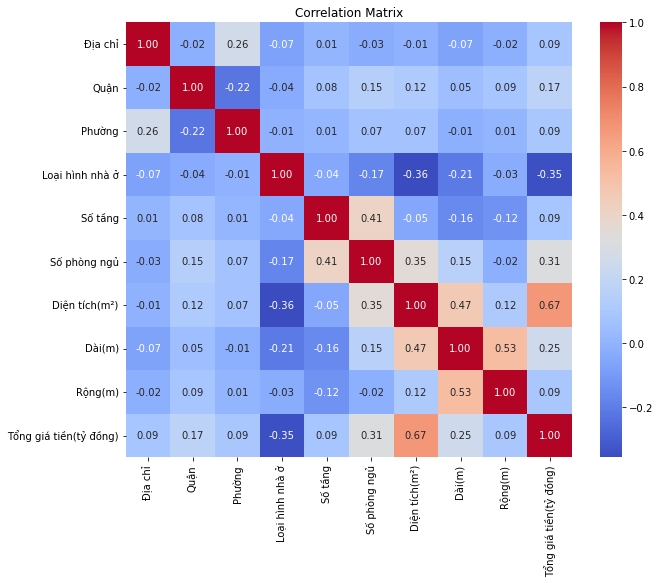

In [39]:


def plotCorrelationMatrix(df, num_cols):
    # Lấy ra tên của các cột
    columns = df.columns.tolist()
    num_features = len(columns)
    
    # Xác định số lượng cột thực tế để hiển thị
    num_display_cols = min(num_cols, num_features)
    
    # Tạo một DataFrame mới chứa chỉ các cột được hiển thị
    df_subset = df[columns[:num_display_cols]]
    
    # Tính ma trận tương quan
    corr = df_subset.corr()
    
    # Vẽ ma trận tương quan bằng heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# Sử dụng hàm plotCorrelationMatrix để vẽ ma trận tương quan
plotCorrelationMatrix(df, 10)


In [40]:
X = df.drop('Tổng giá tiền(tỷ đồng)', axis=1)
y = df['Tổng giá tiền(tỷ đồng)']

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Khởi tạo một đối tượng LinearRegression
linear_reg = LinearRegression()

# Tiếp tục xử lý giá trị NaN trong dữ liệu X bằng SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Huấn luyện mô hình với dữ liệu đã xử lý
linear_reg.fit(X_imputed, y.values)

# Dự đoán
y_pred = linear_reg.predict(X_imputed)



In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print("đ{:,.02f}".format(error))

đ3,025.51


In [43]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [44]:
y_pred = dec_tree_reg.predict(X)

In [45]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("đ{:,.02f}".format(error))

đ176.49


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Xử lý giá trị NaN trong dữ liệu X và y
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

# Khởi tạo mô hình RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)

# Huấn luyện mô hình với dữ liệu đã xử lý
random_forest_reg.fit(X_imputed, y_imputed.ravel())
y_pred = random_forest_reg.predict(X_imputed)

In [47]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("đ{:,.02f}".format(error))

đ1,064.30


In [48]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [49]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("đ{:,.02f}".format(error))

đ176.49


In [50]:
X

,Địa chỉ,Quận,Phường,Loại hình nhà ở,Số tầng,Số phòng ngủ,Diện tích(m²),Dài(m),Rộng(m)
234,9,9,24,1,4,4,40.0,4.0,4.0
1282,5,7,26,2,5,4,40.0,11.0,4.0
1351,0,5,32,2,5,4,28.0,7.8,3.6
1548,0,6,7,3,7,6,40.0,10.0,4.0
1967,5,7,26,3,5,4,50.0,11.0,45.0
...,...,...,...,...,...,...,...,...,...
80590,8,9,12,2,5,5,40.0,9.0,4.0
80816,9,9,35,2,5,5,50.0,12.0,4.0
80827,11,2,54,2,3,3,24.0,7.0,3.0
81617,11,2,15,2,5,3,40.0,10.0,4.0


In [51]:
import numpy as np
X = np.array([["Đường Lê Trọng Tấn","Quận Hà Đông","Phường Dương Nội","Nhà ngõ, hẻm",4,4,40.0,10.0,4.0]])
X

array([['Đường Lê Trọng Tấn', 'Quận Hà Đông', 'Phường Dương Nội',
        'Nhà ngõ, hẻm', '4', '4', '40.0', '10.0', '4.0']], dtype='<U32')

In [52]:
X[:, 0] = le_diachi.transform(X[:, 0]).astype(float)
X[:, 1] = le_quan.transform(X[:, 1]).astype(float)
X[:, 2] = le_phuong.transform(X[:,2]).astype(float)
X[:, 3] = le_loaihinhnha.transform(X[:, 3]).astype(float)
# Chuyển đổi toàn bộ mảng thành kiểu dữ liệu float
X = X.astype(float)

# Hiển thị mảng sau khi chuyển đổi
print(X)


[[ 5.  7.  3.  2.  4.  4. 40. 10.  4.]]


In [53]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3000.])

In [54]:
import pickle
data = {"model": regressor, "le_diachi": le_diachi,"le_quan":le_quan ,"le_phuong":le_phuong,"le_loaihinhnha": le_loaihinhnha}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [55]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_diachi = data["le_diachi"]
le_loaihinhnha = data["le_loaihinhnha"]
le_quan = data["le_quan"]
le_phuong = data["le_phuong"]


In [56]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3000.])